# Machine learning project 

## Prediction of an NBA Team Score
Objective

The objective of this project is to predict the number of points (PTS) scored by an NBA team during a game, using available match statistics.

The target variable (PTS) is continuous, making regression models the natural choice.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , accuracy_score
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import optuna


In [2]:
df = pd.read_csv('final_data.csv')
pd.set_option('display.max_columns', None)
df

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,HOME_TEAM,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,EFG_PCT,PIE,COVID_FLAG,RESULT,SEASON,WIN_PCT
0,21200001,1610612764,Wizards,WAS,Washington,Cavaliers,240:00,32,90,0.356,8,32,0.250,12,20,0.600,18,21,39,26,11,10,12,19,84,-10,0.32,42.60,0,0,12,0.000000
1,21200001,1610612739,Cavaliers,CLE,Cleveland,Cavaliers,240:00,36,79,0.456,7,20,0.350,15,22,0.682,18,36,54,22,7,5,20,21,94,10,0.36,57.40,0,1,12,100.000000
2,21200002,1610612748,Heat,MIA,Miami,Heat,240:00,43,79,0.544,8,16,0.500,26,32,0.813,5,31,36,25,8,5,8,20,120,13,0.43,55.74,0,1,12,100.000000
3,21200002,1610612738,Celtics,BOS,Boston,Heat,240:00,39,75,0.520,6,13,0.462,23,28,0.821,7,34,41,24,4,2,15,23,107,-13,0.39,44.26,0,0,12,0.000000
4,21200003,1610612747,Lakers,LAL,Los Angeles,Lakers,240:00,38,77,0.494,3,13,0.231,12,31,0.387,15,31,46,24,6,5,14,21,91,-8,0.38,45.39,0,0,12,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31335,22401228,1610612742,Mavericks,DAL,Dallas,Warriors,240:00,52,87,0.598,21,41,0.512,18,25,0.720,10,37,47,36,8,5,15,12,143,10,0.52,56.23,0,1,24,47.560976
31336,22401229,1610612749,Bucks,MIL,Milwaukee,Bucks,240:00,39,86,0.453,14,45,0.311,18,27,0.667,6,41,47,28,8,8,12,27,110,8,0.39,55.46,0,1,24,58.536585
31337,22401229,1610612737,Hawks,ATL,Atlanta,Bucks,240:00,35,82,0.427,10,24,0.417,22,34,0.647,7,37,44,23,3,6,13,20,102,-8,0.35,44.54,0,0,24,48.780488
31338,22401230,1610612760,Thunder,OKC,Oklahoma City,Thunder,240:00,36,80,0.450,11,30,0.367,28,32,0.875,4,39,43,19,12,4,12,24,111,15,0.36,67.33,0,1,24,82.926829


# EDA and cleaning 

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31340 entries, 0 to 31339
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GAME_ID            31340 non-null  int64  
 1   TEAM_ID            31340 non-null  int64  
 2   TEAM_NAME          31340 non-null  object 
 3   TEAM_ABBREVIATION  31340 non-null  object 
 4   TEAM_CITY          31340 non-null  object 
 5   HOME_TEAM          31330 non-null  object 
 6   MIN                31340 non-null  object 
 7   FGM                31340 non-null  int64  
 8   FGA                31340 non-null  int64  
 9   FG_PCT             31340 non-null  float64
 10  FG3M               31340 non-null  int64  
 11  FG3A               31340 non-null  int64  
 12  FG3_PCT            31340 non-null  float64
 13  FTM                31340 non-null  int64  
 14  FTA                31340 non-null  int64  
 15  FT_PCT             31340 non-null  float64
 16  OREB               313

In [4]:
df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'TEAM_CITY',
       'HOME_TEAM', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TO', 'PF', 'PTS', 'PLUS_MINUS', 'EFG_PCT', 'PIE', 'COVID_FLAG',
       'RESULT', 'SEASON', 'WIN_PCT'],
      dtype='object')

In [5]:
df.shape

(31340, 32)

In [6]:

columns_to_drop = [
    'GAME_ID', 'TEAM_ID', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'TEAM_CITY',
    'HOME_TEAM', 'MIN', 'RESULT', 'PLUS_MINUS', 'FGM', 'FG3M', 'FTM'
]

df = df.drop(columns=columns_to_drop)
X = df.drop(columns=['PTS'])
y = df['PTS']

In [7]:
df.shape

(31340, 20)

In [8]:
df.columns

Index(['FGA', 'FG_PCT', 'FG3A', 'FG3_PCT', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'EFG_PCT', 'PIE',
       'COVID_FLAG', 'SEASON', 'WIN_PCT'],
      dtype='object')

In [9]:
df.dtypes

FGA             int64
FG_PCT        float64
FG3A            int64
FG3_PCT       float64
FTA             int64
FT_PCT        float64
OREB            int64
DREB            int64
REB             int64
AST             int64
STL             int64
BLK             int64
TO              int64
PF              int64
PTS             int64
EFG_PCT       float64
PIE           float64
COVID_FLAG      int64
SEASON          int64
WIN_PCT       float64
dtype: object

In [10]:
df.isna().sum()

FGA           0
FG_PCT        0
FG3A          0
FG3_PCT       0
FTA           0
FT_PCT        0
OREB          0
DREB          0
REB           0
AST           0
STL           0
BLK           0
TO            0
PF            0
PTS           0
EFG_PCT       0
PIE           0
COVID_FLAG    0
SEASON        0
WIN_PCT       0
dtype: int64

In [11]:
df.isnull().sum()

FGA           0
FG_PCT        0
FG3A          0
FG3_PCT       0
FTA           0
FT_PCT        0
OREB          0
DREB          0
REB           0
AST           0
STL           0
BLK           0
TO            0
PF            0
PTS           0
EFG_PCT       0
PIE           0
COVID_FLAG    0
SEASON        0
WIN_PCT       0
dtype: int64

In [12]:
df.drop_duplicates()

,FGA,FG_PCT,FG3A,FG3_PCT,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,EFG_PCT,PIE,COVID_FLAG,SEASON,WIN_PCT
0,90,0.356,32,0.250,20,0.600,18,21,39,26,11,10,12,19,84,0.32,42.60,0,12,0.000000
1,79,0.456,20,0.350,22,0.682,18,36,54,22,7,5,20,21,94,0.36,57.40,0,12,100.000000
2,79,0.544,16,0.500,32,0.813,5,31,36,25,8,5,8,20,120,0.43,55.74,0,12,100.000000
3,75,0.520,13,0.462,28,0.821,7,34,41,24,4,2,15,23,107,0.39,44.26,0,12,0.000000
4,77,0.494,13,0.231,31,0.387,15,31,46,24,6,5,14,21,91,0.38,45.39,0,12,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31335,87,0.598,41,0.512,25,0.720,10,37,47,36,8,5,15,12,143,0.52,56.23,0,24,47.560976
31336,86,0.453,45,0.311,27,0.667,6,41,47,28,8,8,12,27,110,0.39,55.46,0,24,58.536585
31337,82,0.427,24,0.417,34,0.647,7,37,44,23,3,6,13,20,102,0.35,44.54,0,24,48.780488
31338,80,0.450,30,0.367,32,0.875,4,39,43,19,12,4,12,24,111,0.36,67.33,0,24,82.926829


In [13]:
df.duplicated().sum()

0

In [14]:
df["PTS"].describe()

count    31340.000000
mean       107.777728
std         13.470762
min         58.000000
25%         98.000000
50%        108.000000
75%        117.000000
max        176.000000
Name: PTS, dtype: float64

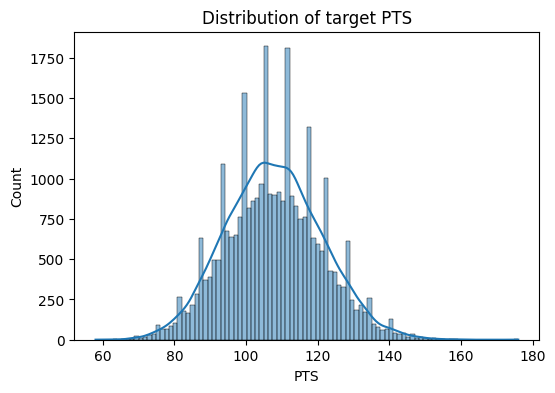

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(df["PTS"], kde=True)
plt.title("Distribution of target PTS")
plt.xlabel("PTS")
plt.show()

In [16]:
df["PTS"].value_counts().head(10)

PTS
104    967
105    935
109    914
112    909
107    904
111    901
108    897
113    890
106    886
103    877
Name: count, dtype: int64

In [17]:
df_numeric=df.select_dtypes(include=[np.number])
corr_matrix=df_numeric.corr()
corr_matrix["PTS"].sort_values(ascending=False)

PTS           1.000000
EFG_PCT       0.715592
FG_PCT        0.695641
AST           0.620857
PIE           0.501859
FG3_PCT       0.474164
SEASON        0.400770
FG3A          0.395143
FGA           0.372032
FTA           0.221180
WIN_PCT       0.203880
FT_PCT        0.185244
DREB          0.165327
REB           0.133999
COVID_FLAG    0.123030
PF            0.115300
STL           0.079746
BLK           0.057099
OREB         -0.004375
TO           -0.138352
Name: PTS, dtype: float64

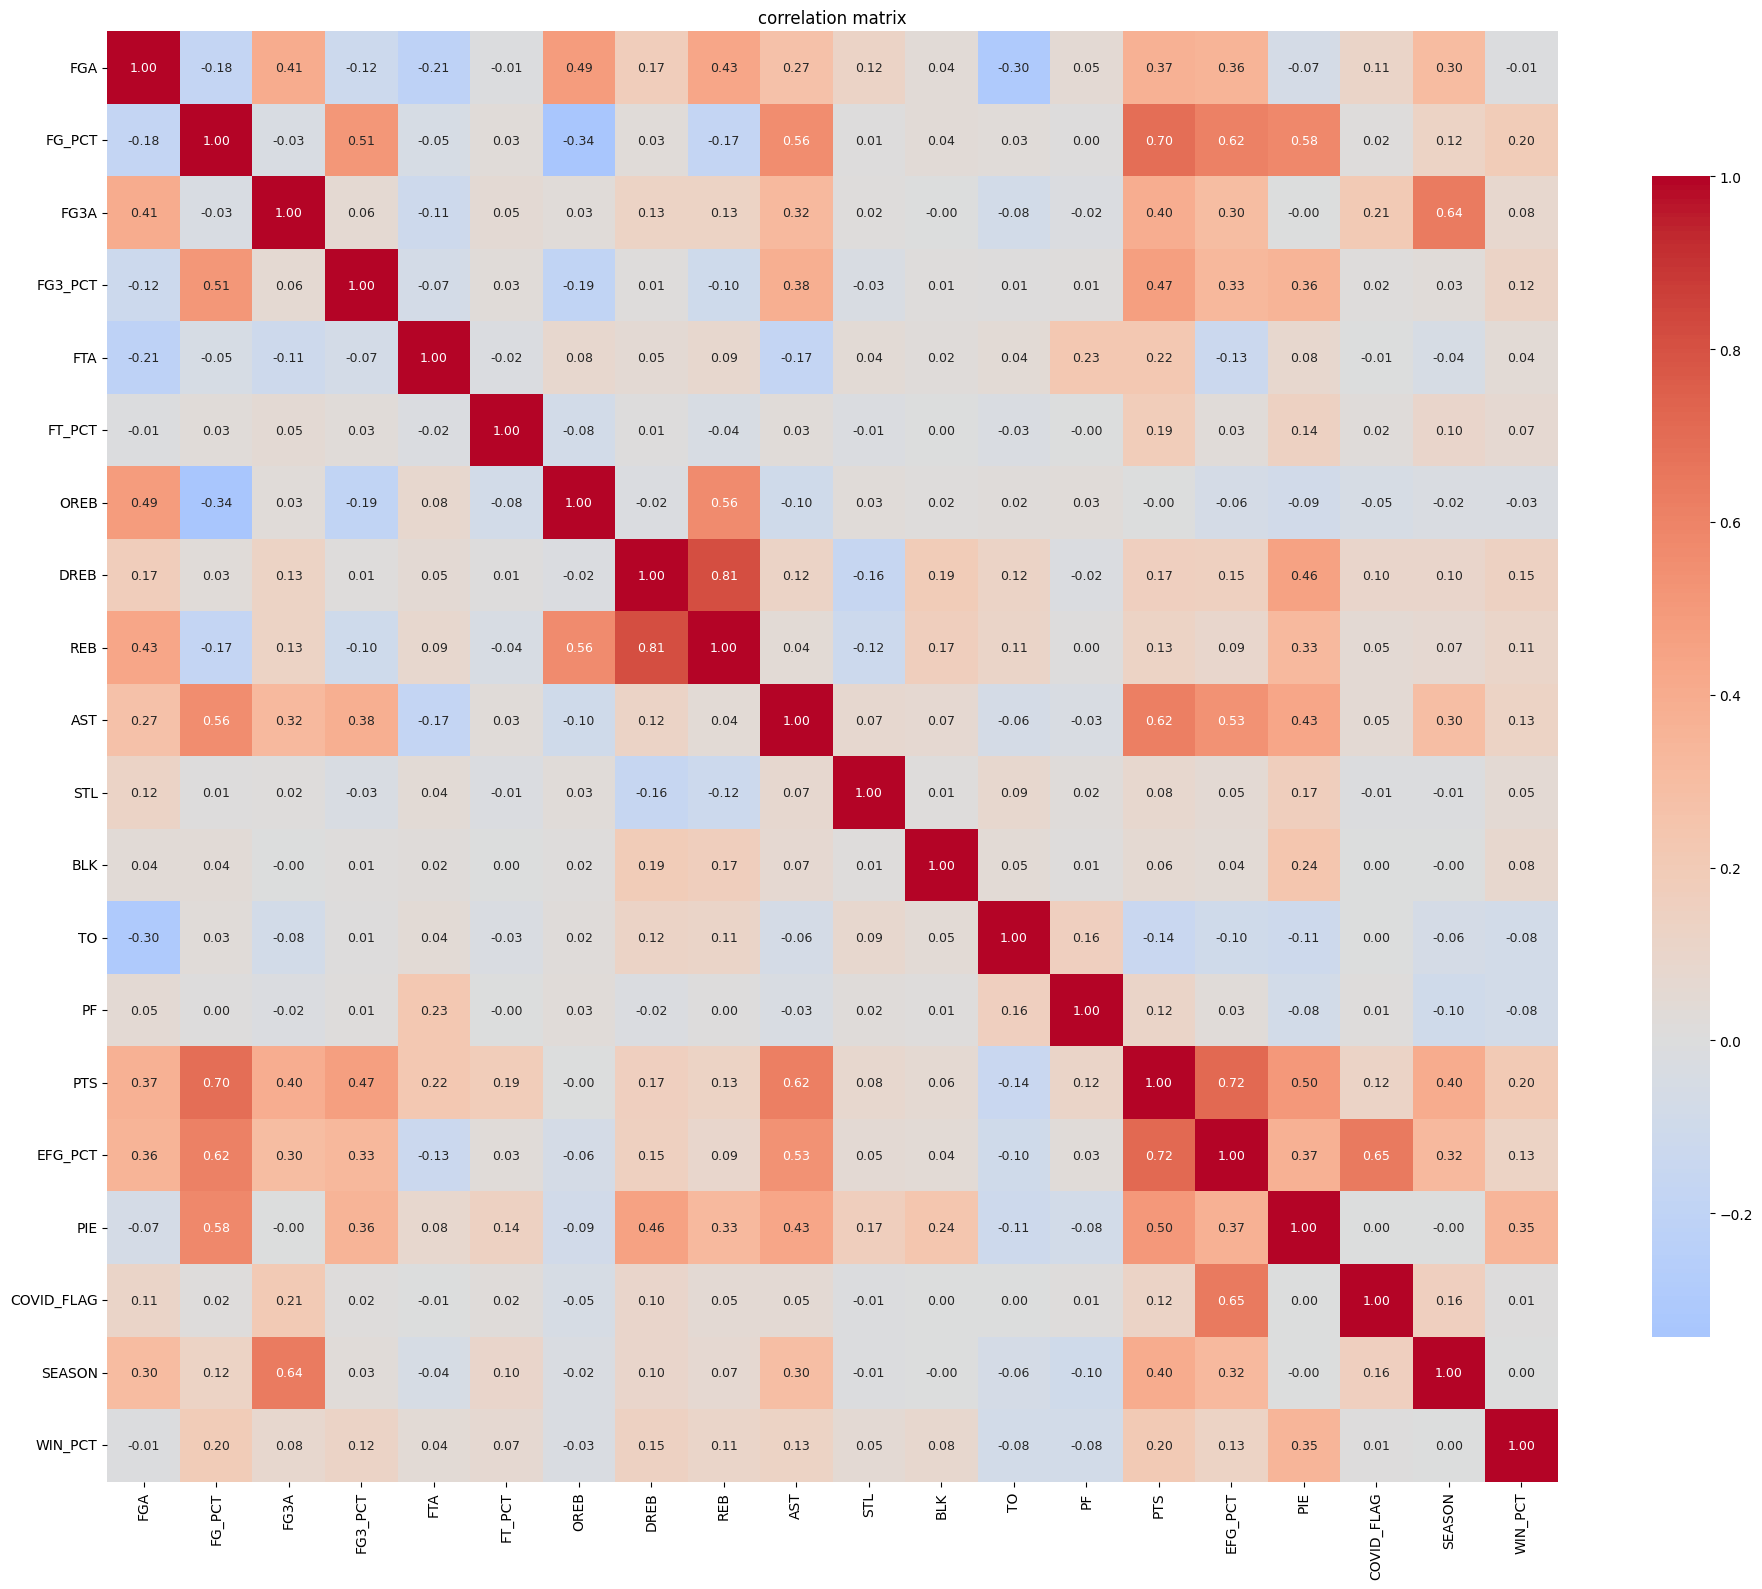

In [18]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, cbar_kws={"shrink":0.8}, annot_kws={"size":9})
plt.title('correlation matrix')
plt.tight_layout()
plt.show()

In [19]:
label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Random forest model

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [22]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"R²   : {r2:.3f}")

RMSE : 2.22
MAE  : 1.49
R²   : 0.973


c:\Users\hajji\anaconda3\envs\ecl-course-2025\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Visualisation of predictions

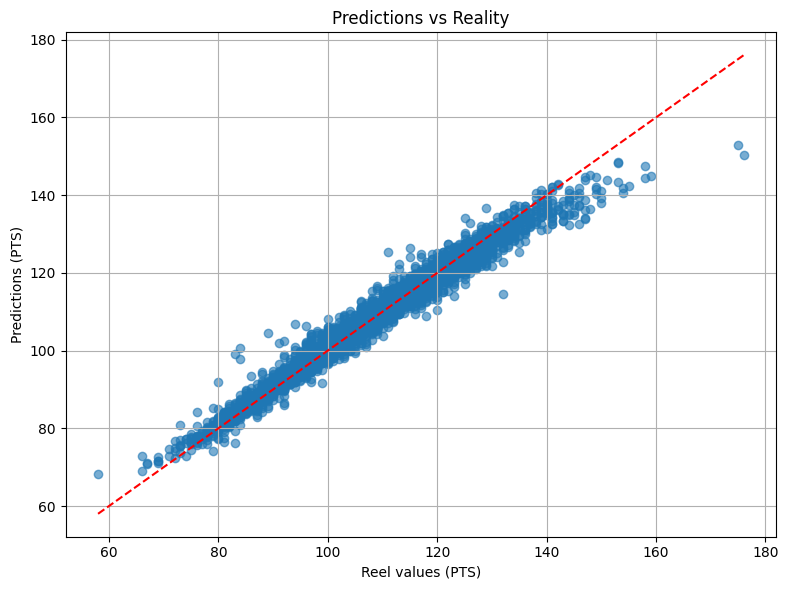

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Reel values (PTS)")
plt.ylabel("Predictions (PTS)")
plt.title("Predictions vs Reality")
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature importance 

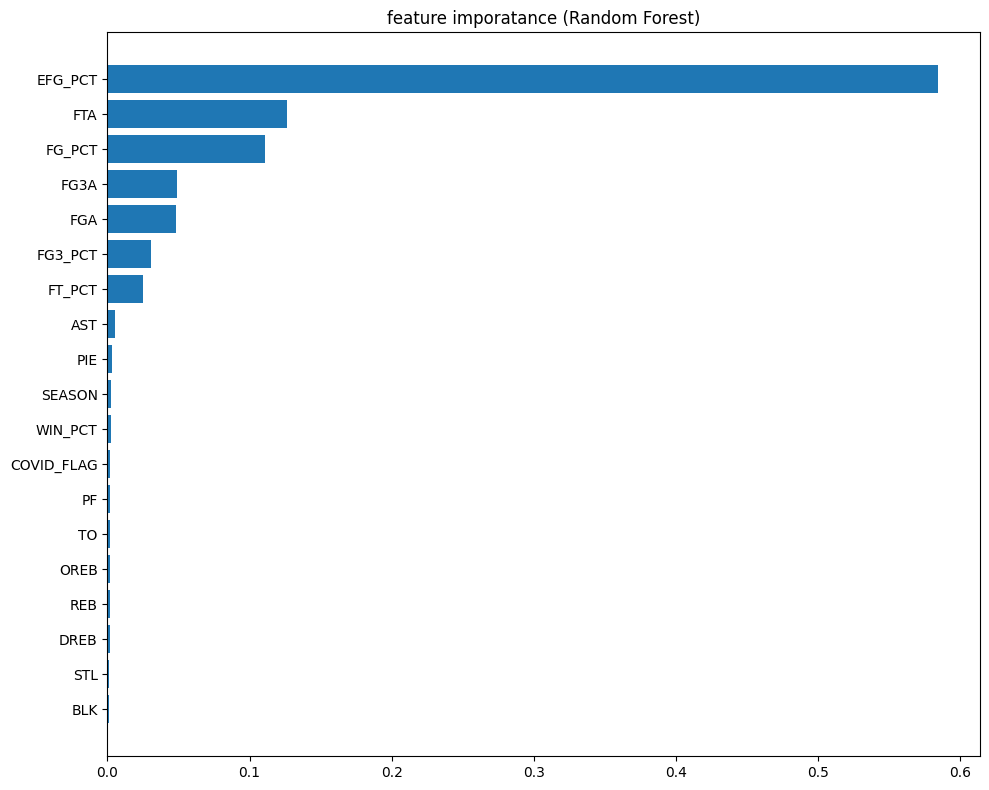

In [24]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("feature imporatance (Random Forest)")
plt.tight_layout()
plt.show()

# Optuna (random forest)

In [25]:

 
def objective(trial):


	n_estimators = trial.suggest_int('n_estimators', 50, 300)
	max_depth = trial.suggest_int('max_depth', 3, 20)
	min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
	min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
	model = RandomForestRegressor(

    	n_estimators=n_estimators,
    	max_depth=max_depth,
    	min_samples_split=min_samples_split,
    	min_samples_leaf=min_samples_leaf,
    	random_state=42
	
    )
 
	score = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='r2')
	return score.mean()
 

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best hyperparamètres :", study.best_params)


[I 2025-12-07 22:21:03,599] A new study created in memory with name: no-name-f762b757-1c4a-4997-a41a-31b0ef8b18b6
[I 2025-12-07 22:21:56,475] Trial 0 finished with value: 0.965570827128091 and parameters: {'n_estimators': 268, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.965570827128091.
[I 2025-12-07 22:22:08,516] Trial 1 finished with value: 0.8239203795500458 and parameters: {'n_estimators': 144, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.965570827128091.
[I 2025-12-07 22:23:11,170] Trial 2 finished with value: 0.972825355713059 and parameters: {'n_estimators': 193, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.972825355713059.
[I 2025-12-07 22:23:46,768] Trial 3 finished with value: 0.962260642085238 and parameters: {'n_estimators': 183, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 2 with value: 0.972

Best hyperparamètres : {'n_estimators': 193, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 1}


In [26]:
best_params = study.best_params
final_model = RandomForestRegressor(**best_params, random_state=42)
final_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=19, min_samples_split=3, n_estimators=193,
                      random_state=42)

In [27]:
y_pred = final_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("R²:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R²: 0.9727118639876148
MAE: 1.4970368414856552
RMSE: 2.2215355825790795


# XGboost model

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
model = XGBRegressor(
    n_estimators=4000,        
    learning_rate=0.1,       
    max_depth=8,             
    early_stopping_rounds=None,           
    random_state=42,
    verbosity=1             
)

In [31]:
model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=4000,
             n_jobs=None, num_parallel_tree=None, ...)

In [32]:
score=model.score(X_train_scaled, y_train)
score


0.9999999403953552

In [33]:
score=model.score(X_test_scaled, y_test)
score 

0.9923259019851685

# optuna (xgboost)

In [34]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_scaled, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
) 

In [35]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [36]:
def objective(trial):

    model = XGBRegressor(
        n_estimators=500,
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        max_depth=trial.suggest_int("max_depth", 3, 10),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 20),
        subsample=trial.suggest_float("subsample", 0.6, 1.0),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.6, 1.0),
        reg_lambda=trial.suggest_float("reg_lambda", 1e-3, 50, log=True),
        reg_alpha=trial.suggest_float("reg_alpha", 1e-3, 50, log=True),
        gamma=trial.suggest_float("gamma", 0.0, 5.0),
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    return r2_score(y_val, y_pred)


In [37]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, show_progress_bar=True)


[I 2025-12-07 22:45:26,159] A new study created in memory with name: no-name-f8e631bf-2db5-4d42-8e8b-0bafc93ba4f7


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-12-07 22:45:26,875] Trial 0 finished with value: 0.979053795337677 and parameters: {'learning_rate': 0.020258125839843905, 'max_depth': 3, 'min_child_weight': 14, 'subsample': 0.9212918808442123, 'colsample_bytree': 0.7014925460092404, 'reg_lambda': 0.006345713374692302, 'reg_alpha': 0.043497690789034905, 'gamma': 1.457143189868132}. Best is trial 0 with value: 0.979053795337677.
[I 2025-12-07 22:45:27,821] Trial 1 finished with value: 0.9909002780914307 and parameters: {'learning_rate': 0.016348695747750126, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8315544706659387, 'colsample_bytree': 0.9799266847315113, 'reg_lambda': 0.004633118647088144, 'reg_alpha': 0.043146157837452, 'gamma': 2.8291082094051805}. Best is trial 1 with value: 0.9909002780914307.
[I 2025-12-07 22:45:29,920] Trial 2 finished with value: 0.9937952756881714 and parameters: {'learning_rate': 0.025304654659582138, 'max_depth': 10, 'min_child_weight': 20, 'subsample': 0.7690984773698188, 'colsample_by

In [38]:
study.best_params



{'learning_rate': 0.07082641093597503,
 'max_depth': 4,
 'min_child_weight': 14,
 'subsample': 0.7079654787578099,
 'colsample_bytree': 0.7806233876239601,
 'reg_lambda': 0.8327550718299088,
 'reg_alpha': 2.995846903903651,
 'gamma': 4.874331501126397}

In [39]:
study.best_value

0.9964999556541443

In [40]:
best_params = study.best_params

final_model = XGBRegressor(
    **best_params,
    n_estimators=4000,
    random_state=42,
    n_jobs=-1,
    tree_method="hist"
)

final_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7806233876239601, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=4.874331501126397, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07082641093597503,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=14, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=4000, n_jobs=-1,
             num_parallel_tree=None, ...)

# CATboost model

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
def objective(trial):
    depth = trial.suggest_int('depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    iterations = trial.suggest_int('iterations', 200, 1000)

    model = CatBoostRegressor(
        depth=depth,
        learning_rate=learning_rate,
        iterations=iterations,
        verbose=0  
    )
    
    score = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='r2')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best hyperparamètres :", study.best_params)


[I 2025-12-07 22:46:14,601] A new study created in memory with name: no-name-e58f2b66-8bcb-4f80-a2ca-5e9eb1bbae4a
[I 2025-12-07 22:46:25,364] Trial 0 finished with value: 0.9989199432320496 and parameters: {'depth': 7, 'learning_rate': 0.08554042849502598, 'iterations': 712}. Best is trial 0 with value: 0.9989199432320496.
[I 2025-12-07 22:46:39,124] Trial 1 finished with value: 0.9991186900697938 and parameters: {'depth': 7, 'learning_rate': 0.11839091261432579, 'iterations': 972}. Best is trial 1 with value: 0.9991186900697938.
[I 2025-12-07 22:46:45,986] Trial 2 finished with value: 0.9993618652046113 and parameters: {'depth': 4, 'learning_rate': 0.21720698939995597, 'iterations': 930}. Best is trial 2 with value: 0.9993618652046113.
[I 2025-12-07 22:46:51,348] Trial 3 finished with value: 0.99410687358818 and parameters: {'depth': 3, 'learning_rate': 0.033804822063578314, 'iterations': 823}. Best is trial 2 with value: 0.9993618652046113.
[I 2025-12-07 22:47:17,780] Trial 4 finishe

Best hyperparamètres : {'depth': 4, 'learning_rate': 0.2987305490451944, 'iterations': 902}


In [43]:
model.fit(X_train_scaled, y_train)
print(model.score(X_test_scaled, y_test))


0.9923259019851685


In [44]:
 
best_params = study.best_params
best_params

{'depth': 4, 'learning_rate': 0.2987305490451944, 'iterations': 902}

In [45]:
model = CatBoostRegressor(
    depth=4,
    learning_rate=0.24796976097472606,
    iterations=716,
    random_seed=42,
    verbose=100  
)

model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test)

0:	learn: 11.5546841	total: 4.82ms	remaining: 3.44s
100:	learn: 1.0325833	total: 301ms	remaining: 1.83s
200:	learn: 0.6582809	total: 571ms	remaining: 1.46s
300:	learn: 0.4850097	total: 841ms	remaining: 1.16s
400:	learn: 0.3973683	total: 1.1s	remaining: 868ms
500:	learn: 0.3343989	total: 1.37s	remaining: 589ms
600:	learn: 0.2938837	total: 1.64s	remaining: 313ms
700:	learn: 0.2640208	total: 1.91s	remaining: 40.8ms
715:	learn: 0.2599778	total: 1.95s	remaining: 0us


In [46]:
model.score(X_test_scaled, y_test)

0.999337284393664

# TSNE

In [47]:
df = df.sample(frac=0.1, random_state=42).reset_index(drop=True)

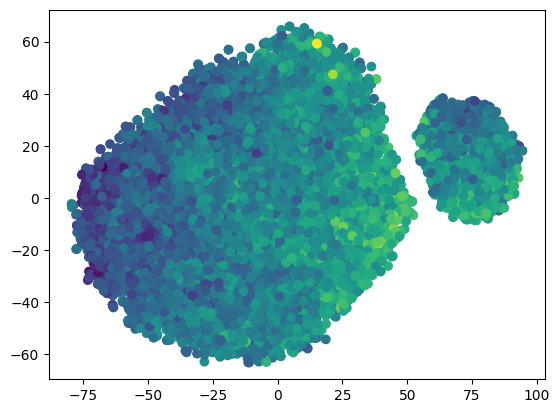

In [48]:
X_sub, _, y_sub, _ = train_test_split(
    X_train_scaled, y_train, 
    test_size=0.5,  
    random_state=42,
    shuffle=True
)
Z = TSNE().fit_transform(X_sub)
plt.scatter(Z[:, 0], Z[:, 1], c=y_sub)
plt.show()